In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [ ]:

result = pd.DataFrame()

for j in range(1 , 100):
    url = "https://www.flipkart.com/search?q=smart+watch&sid=ajy%2Cbuh&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_2_4_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_2_4_na_na_na&as-pos=2&as-type=RECENT&suggestionId=smart+watch%7CSmart+Watches&requestId=6da9f756-4cc2-4a84-b836-07e5f3584bdc&as-searchtext=smar&page={}".format(j)


    webpage = requests.get(url ).text
    soup = BeautifulSoup(webpage)
    watches = soup.find_all('div' ,class_="_1xHGtK _373qXS")



    price = []
    per_off = []
    rs_off = []
    brand = []
    sponcerd = []
    color = []
    display = []
    BtCalling = []
    charging = []

    for i in watches:

        try :
            brand.append(i.find('a' , class_="IRpwTa").text.split('|')[0])
        except :
            brand.append(np.nan)

        try :

            color.append(i.find('div' , class_="_3eWWd-").text.split(',')[0])
        except :
            color.append(np.nan)

        try :
            display.append(i.find('a' , class_="IRpwTa").text.split('|')[1])
        except :
            display.append(np.nan)

        try :
            BtCalling.append(i.find('a' , class_="IRpwTa").text.split('|')[2])

        except :
            BtCalling.append(np.nan)

        try :

            charging.append(i.find('a' , class_="IRpwTa").text.split('|')[3])
        except :
            charging.append(np.nan)
        try :

            price.append(i.find('div' , class_="_30jeq3").text)

        except :
            price.append(np.nan)

        try :

            rs_off.append(i.find('div' , class_="_3I9_wc").text)

        except :
            rs_off.append(np.nan)

        try :

            per_off.append(i.find('div' , class_="_3Ay6Sb").text.split('%')[0])
        except :
            per_off.append(np.nan)


        try :
            sponcerd.append(i.find('div' , class_="_2I5qvP").text)
        except :
            sponcerd.append(np.nan)

    d = {'brand':brand , "sponcerd":sponcerd ,   'price':price , 'rs_off':rs_off , 'per_off':per_off , 'Btcalling':BtCalling , 'carging':charging , 'color':color , 'display':display}

    df = pd.DataFrame(d)

    result = pd.concat([result , df] , ignore_index=True)


In [12]:
df = pd.read_csv('/content/watches.csv')

In [13]:
df

,brand,sponcerd,price,rs_off,per_off,Btcalling,carging,color,display
0,Fastrack Revoltt FS1,Sponsored,₹999,"₹3,995",74,BT Calling,Fastcharge...,Black Strap,1.83 Display
1,"Fire-Boltt Hurricane 1.3"" Curved Glass Display...",Sponsored,"₹1,149","₹8,999",87,NaN,NaN,Black Strap,NaN
2,"Fire-Boltt Rise BT Calling,1.85"", Voice Assist...",NaN,"₹1,249","₹11,999",89,NaN,NaN,Black Strap,NaN
3,Fire-Boltt Ninja Pro Max Plus 1.83 Smartwatch,NaN,"₹1,099","₹7,999",86,NaN,NaN,Pink Gold Strap,NaN
4,Noise Colorfit Icon 2 1.8'' Display with Bluet...,NaN,"₹1,149","₹5,999",80,NaN,NaN,Blue Strap,NaN
...,...,...,...,...,...,...,...,...,...
995,SHRIRAJ DZ09 Bluetooth Smartwatch with Sim Slo...,NaN,₹748,"₹1,457",48,NaN,NaN,Black Strap,NaN
996,"Boult Drift BT Calling 1.69"" HD Display, 140+ ...",Sponsored,"₹1,099","₹7,999",86,NaN,NaN,Green Strap,NaN
997,"Boult Drift BT Calling 1.69"" HD Display, 140+ ...",Sponsored,"₹1,099","₹7,999",86,NaN,NaN,Blue Strap,NaN
998,Storia dz09 Smartwatch,NaN,₹999,"₹1,299",23,NaN,NaN,Black Strap,NaN


In [14]:
df['price'] = df['price'].str.split('₹').str.get(1).str.replace(',' , '')

In [15]:
df['rs_off'] = df['rs_off'].str.split('₹').str.get(1).str.replace(',' , '')

In [16]:
df['color'] = df['color'].str.replace('Strap' , '')

In [17]:
df['per_off'].isnull().sum()

0

In [18]:
df['carging'].isnull().sum()

976

In [19]:
df.drop(columns='carging' , inplace=True)

In [20]:
df['Btcalling'].isnull().sum()

957

In [21]:
df['brand'].loc[10]

"Boult Crown 1.95'' Screen, BT Calling, Working Crown, Z..."

In [22]:
df['brand_name'] = df['brand'].str.split().str.get(0)

In [23]:
df['model_name'] = df['brand'].str.split().str.get(1)

In [24]:
# df['Btcalling']= np.nan

df.loc[df['brand'].str.contains('BT Calling', case=False , regex=False) , 'Btcalling'] = 'yes'
df.loc[df['brand'].str.contains('Bluetooth Call', case=False , regex=False) , 'Btcalling'] = 'yes'
df.loc[df['brand'].str.contains('Bluetooth calling', case=False , regex=False) , 'Btcalling'] = 'yes'
df.loc[df['brand'].str.contains('bluetooth calling', case=False , regex=False) , 'Btcalling'] = 'yes'


In [25]:
df['Btcalling'].isnull().sum()

512

In [26]:
df['brand'].loc[311]

'Boult Drift BT Calling 1.69" HD Display, 140+ Watchface...'

In [27]:
df['Btcalling'] = df['Btcalling'].str.replace('BT Calling' , 'yes')

In [28]:
df.drop(columns=['display'] , inplace=True)

In [29]:
df.rename({'sponcerd':'sponsored'} , inplace=True)

In [35]:
a = df[df.duplicated()].index

In [36]:
df.drop(a , inplace=True)

In [38]:
df['brand_name'] = df['brand_name'].str.title()

In [40]:
df['model_name'] = df['model_name'].str.title()

In [42]:
column_order = ['brand_name', 'model_name', 'color', 'price', 'sponcerd', 'rs_off', 'per_off', 'Btcalling']

# Reorder the columns in the DataFrame
df = df[column_order]

# Print the DataFrame to verify the changes
df

,brand_name,model_name,color,price,sponcerd,rs_off,per_off,Btcalling
0,Fastrack,Revoltt,Black,999,Sponsored,3995,74,yes
1,Fire-Boltt,Hurricane,Black,1149,Sponsored,8999,87,NaN
2,Fire-Boltt,Rise,Black,1249,NaN,11999,89,yes
3,Fire-Boltt,Ninja,Pink Gold,1099,NaN,7999,86,NaN
4,Noise,Colorfit,Blue,1149,NaN,5999,80,yes
...,...,...,...,...,...,...,...,...
993,Boat,Lunar,Metal Grey,1599,NaN,8499,81,NaN
994,Shopevolves,Nextfit,Black,1789,NaN,13999,87,NaN
995,Shriraj,Dz09,Black,748,NaN,1457,48,NaN
998,Storia,Dz09,Black,999,NaN,1299,23,NaN


In [43]:
df.to_csv('watches_clean.csv' , index=False)

In [44]:
df = pd.read_csv('/content/watches_clean.csv')

### EDA

# which brand has most buyers

In [45]:
df['brand_name'] = df['brand_name'].str.title()

<Axes: xlabel='brand_name'>

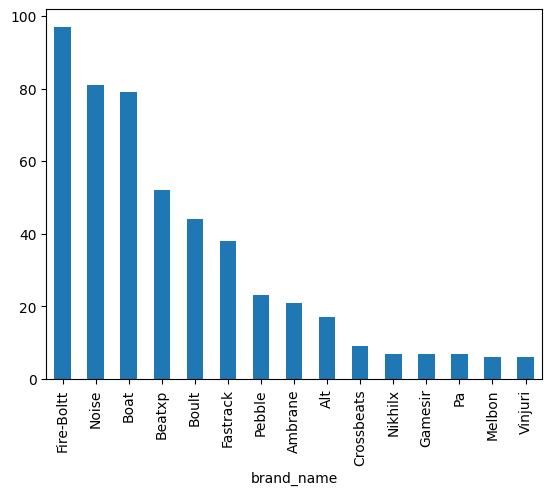

In [46]:
df['brand_name'].value_counts().head(15).plot(kind='bar')

# which brand use which model most

<Axes: xlabel='model_name'>

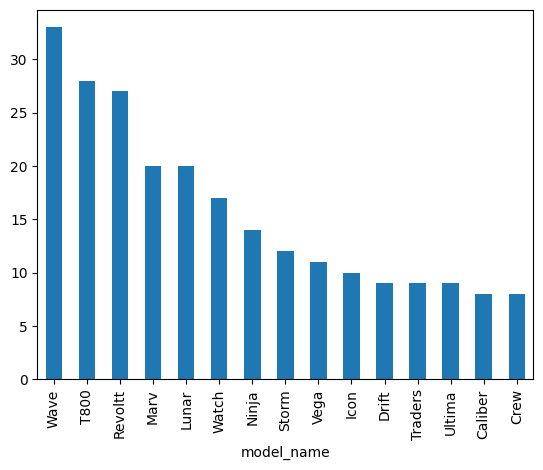

In [47]:
df['model_name'].value_counts().head(15).plot(kind='bar')

In [48]:
pd.crosstab(df['model_name'].head(30) , df['brand_name'].head(30))

brand_name,Boat,Boult,Fastrack,Fire-Boltt,Melbon,Noise
model_name,,,,,,
"1.75""",0,0,0,0,1,0
Colorfit,0,0,0,0,0,3
Crew,0,0,0,0,0,2
Crown,0,2,0,0,0,0
Crownr,0,1,0,0,0,0
Crownx,0,1,0,0,0,0
Dream,0,0,0,1,0,0
Hurricane,0,0,0,3,0,0
Icon,0,0,0,0,0,4


In [49]:
df['model_name'].value_counts().head(15)

model_name
Wave       33
T800       28
Revoltt    27
Marv       20
Lunar      20
Watch      17
Ninja      14
Storm      12
Vega       11
Icon       10
Drift       9
Traders     9
Ultima      9
Caliber     8
Crew        8
Name: count, dtype: int64

In [50]:
df

,brand_name,model_name,color,price,sponcerd,rs_off,per_off,Btcalling
0,Fastrack,Revoltt,Black,999,Sponsored,3995,74,yes
1,Fire-Boltt,Hurricane,Black,1149,Sponsored,8999,87,NaN
2,Fire-Boltt,Rise,Black,1249,NaN,11999,89,yes
3,Fire-Boltt,Ninja,Pink Gold,1099,NaN,7999,86,NaN
4,Noise,Colorfit,Blue,1149,NaN,5999,80,yes
...,...,...,...,...,...,...,...,...
642,Boat,Lunar,Metal Grey,1599,NaN,8499,81,NaN
643,Shopevolves,Nextfit,Black,1789,NaN,13999,87,NaN
644,Shriraj,Dz09,Black,748,NaN,1457,48,NaN
645,Storia,Dz09,Black,999,NaN,1299,23,NaN


# which brand using which model

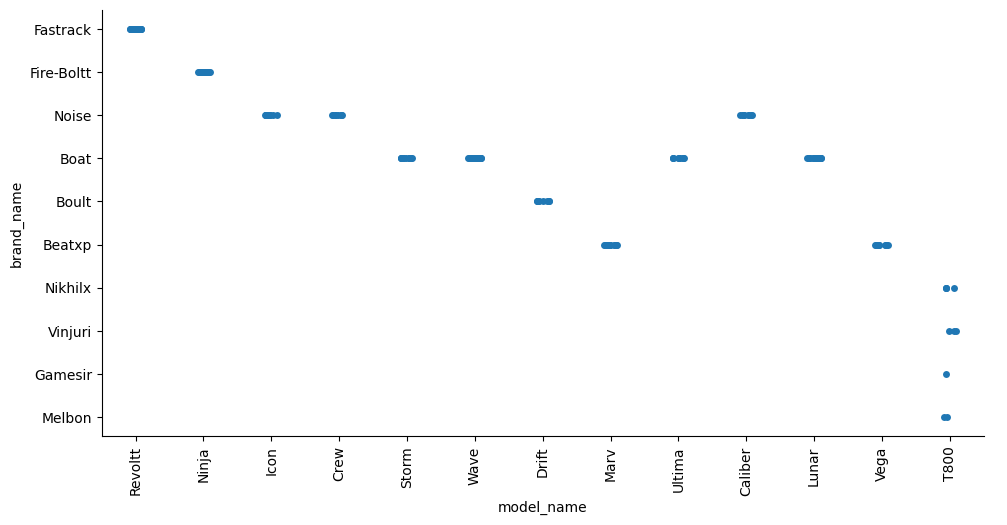

In [51]:
top_model_names = df['model_name'].value_counts().head(15).index.tolist()
top_brand_names = df['brand_name'].value_counts().head(15).index.tolist()

# Filter the DataFrame to keep only the top 15 values
df_filtered = df[df['model_name'].isin(top_model_names) & df['brand_name'].isin(top_brand_names)]

# Plot the filtered data using catplot
sns.catplot(data=df_filtered, x='model_name', y='brand_name', kind='strip', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

# which brand has maximum price

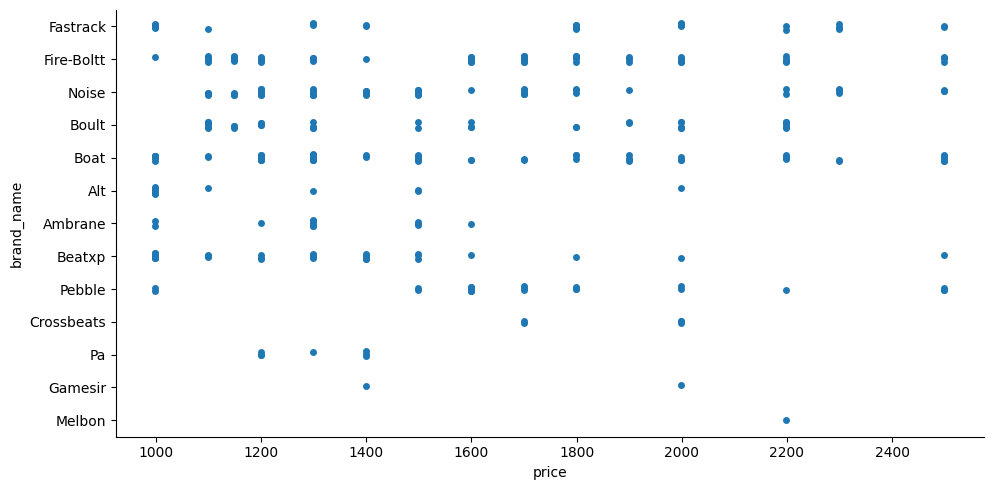

In [55]:
top_brand_names = df['brand_name'].value_counts().head(15).index.tolist()
top_price = df['price'].value_counts().head(15).index.tolist()


filtered = df[df['brand_name'].isin(top_brand_names) & df['price'].isin(top_price)]

sns.catplot(data=filtered , x='price', y='brand_name', kind='strip', height=5, aspect=2 )
plt.xticks()
plt.show()


# which brand and model is most expensive

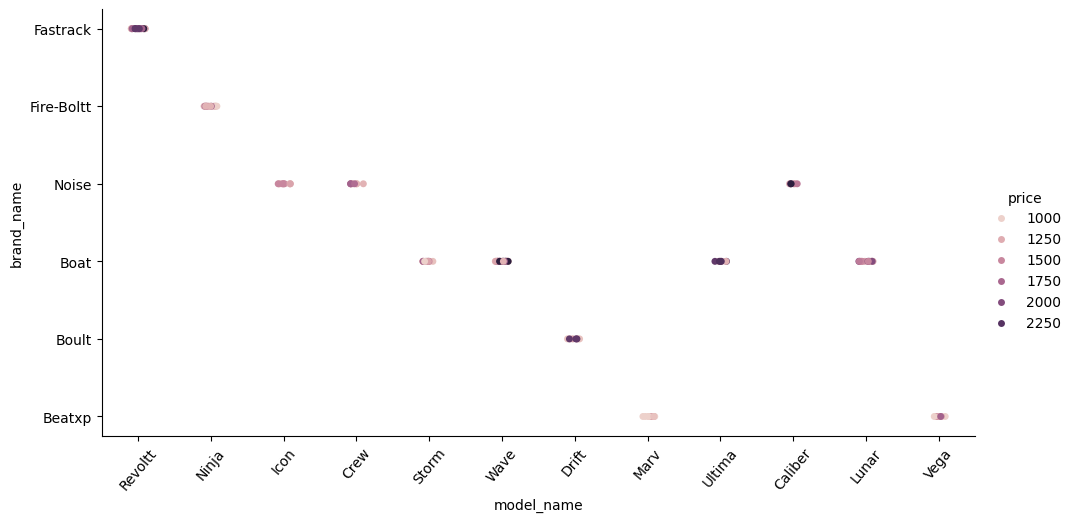

In [57]:
top_brand_name = df['brand_name'].value_counts().head(15).index.tolist()
top_model_name = df['model_name'].value_counts().head(15).index.tolist()
top_price = df['price'].value_counts().head(15).index.tolist()

filtered = df[df['brand_name'].isin(top_brand_name) & df['model_name'].isin(top_model_name) & df['price'].isin(top_price)]

sns.catplot(data=filtered , x='model_name' , y='brand_name' , hue='price' ,kind='strip', height=5, aspect=2 )
plt.xticks(rotation=50)
plt.show()

# which brand has bluethooth calling and whats their price

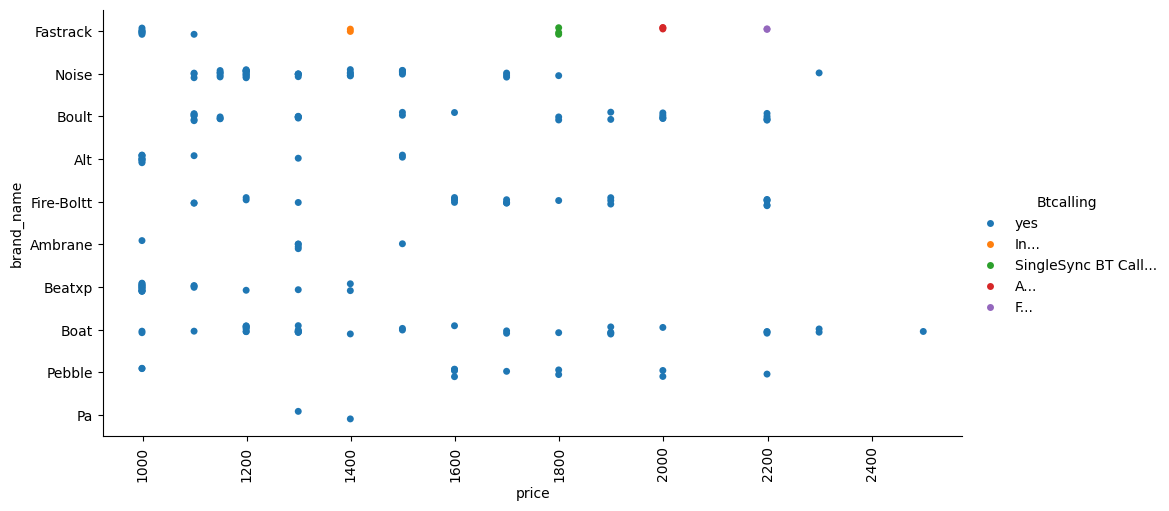

In [65]:
top_brand_name = df['brand_name'].value_counts().head(15).index.tolist()
top_btcalling = df['Btcalling'].value_counts().head(15).index.tolist()
top_price = df['price'].value_counts().head(15).index.tolist()

filtered = df[df['brand_name'].isin(top_brand_name) & df['Btcalling'].isin(top_btcalling) &  df['price'].isin(top_price)]

sns.catplot(data=filtered , x='price' , y='brand_name' , hue='Btcalling'  , kind='strip', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

# which brand has bluethooth calling

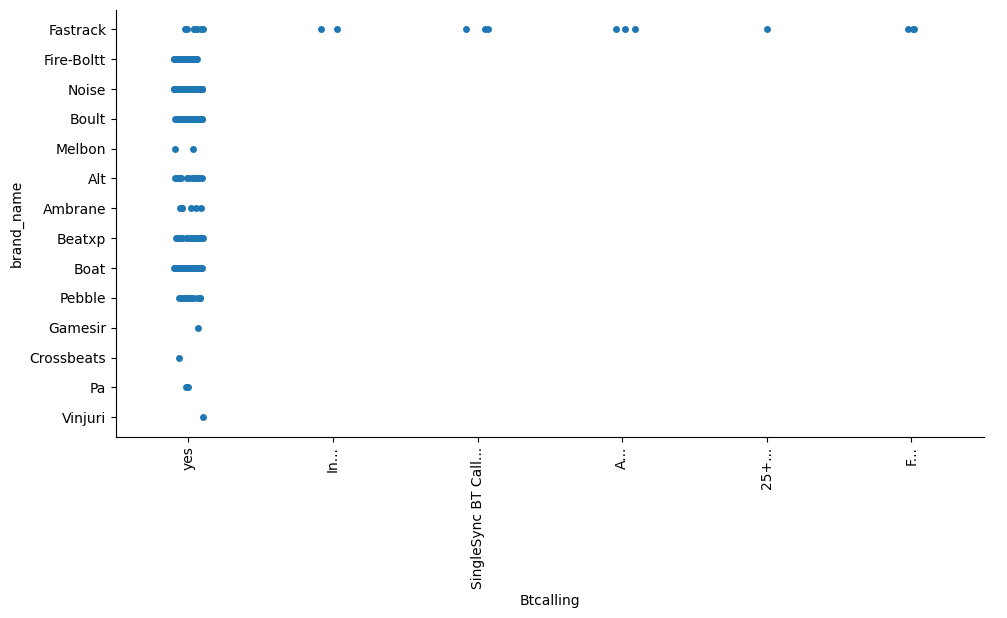

In [70]:
top_brand_name = df['brand_name'].value_counts().head(15).index.tolist()
top_btcalling = df['Btcalling'].value_counts().head(15).index.tolist()


filtered = df[df['brand_name'].isin(top_brand_name) & df['Btcalling'].isin(top_btcalling) ]

sns.catplot(data=filtered , x='Btcalling' , y='brand_name'   , kind='strip', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

# which brand are sponsered

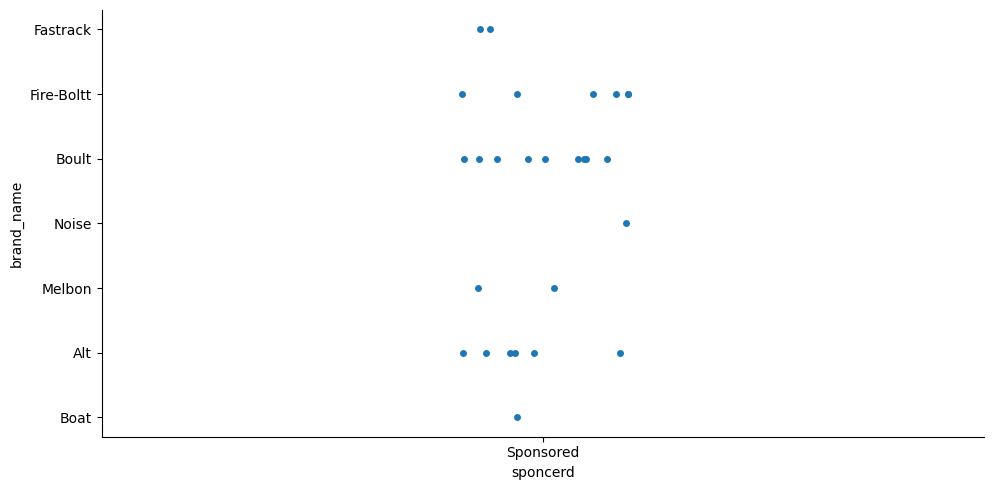

In [77]:
top_brand_name = df['brand_name'].value_counts().head(15).index.tolist()
top_sponsered = df['sponcerd'].value_counts().head(15).index.tolist()


filtered = df[df['brand_name'].isin(top_brand_name) & df['sponcerd'].isin(top_sponsered) ]

sns.catplot(data=filtered , x='sponcerd' , y='brand_name'   , kind='strip', height=5, aspect=2)
# plt.xticks(rotation=90)
plt.show()

# color of topest brand

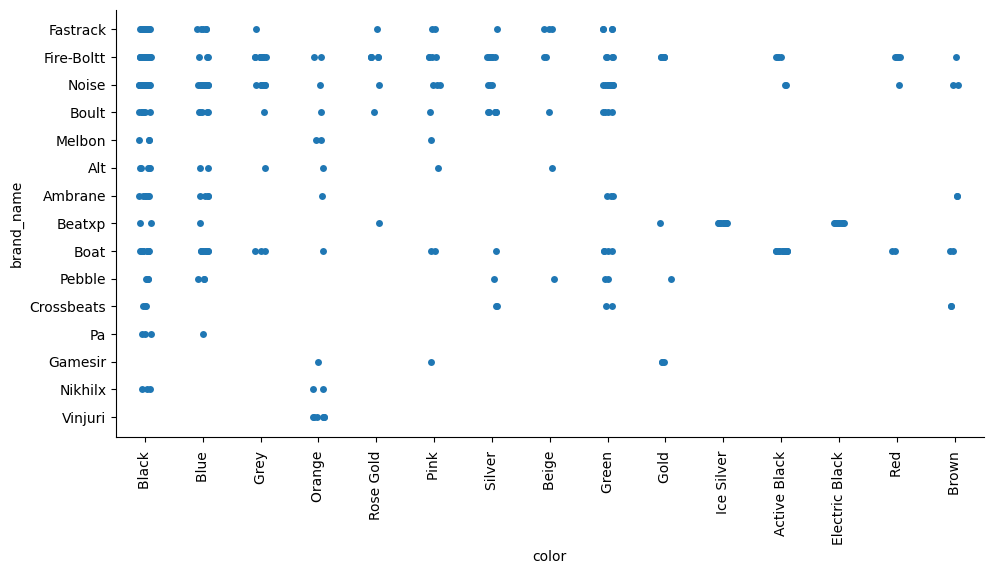

In [80]:
top_brand_name = df['brand_name'].value_counts().head(15).index.tolist()
top_color = df['color'].value_counts().head(15).index.tolist()


filtered = df[df['brand_name'].isin(top_brand_name) & df['color'].isin(top_color) ]

sns.catplot(data=filtered , x='color' , y='brand_name'   , kind='strip', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

# Do color affect price of brand ?

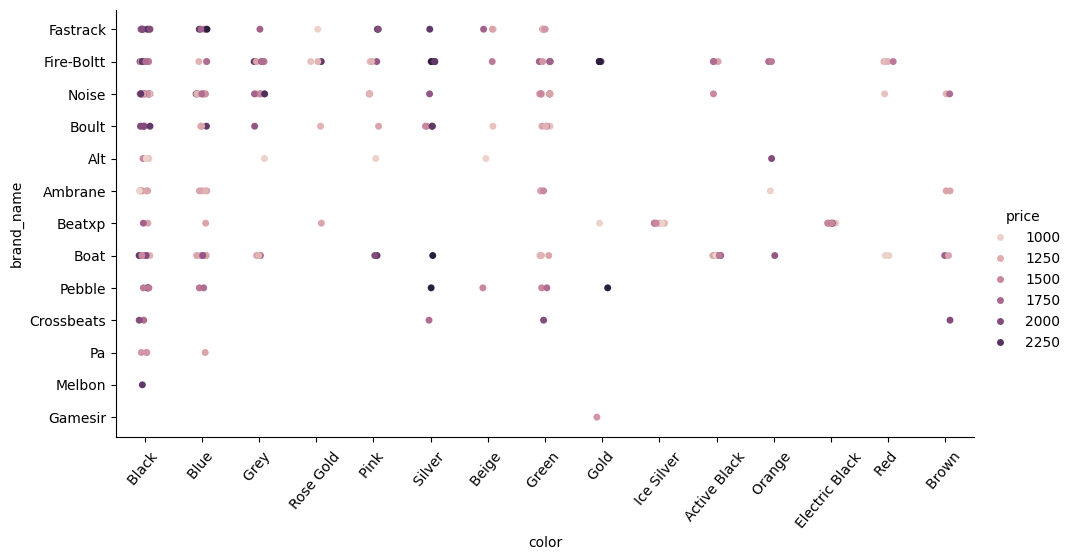

In [83]:
top_brand_name = df['brand_name'].value_counts().head(15).index.tolist()
top_color = df['color'].value_counts().head(15).index.tolist()
top_price = df['price'].value_counts().head(15).index.tolist()

filtered = df[df['brand_name'].isin(top_brand_name) & df['color'].isin(top_color) & df['price'].isin(top_price)]

sns.catplot(data=filtered , x='color' , y='brand_name' , hue='price' ,kind='strip', height=5, aspect=2 )
plt.xticks(rotation=50)
plt.show()

# does color affect price

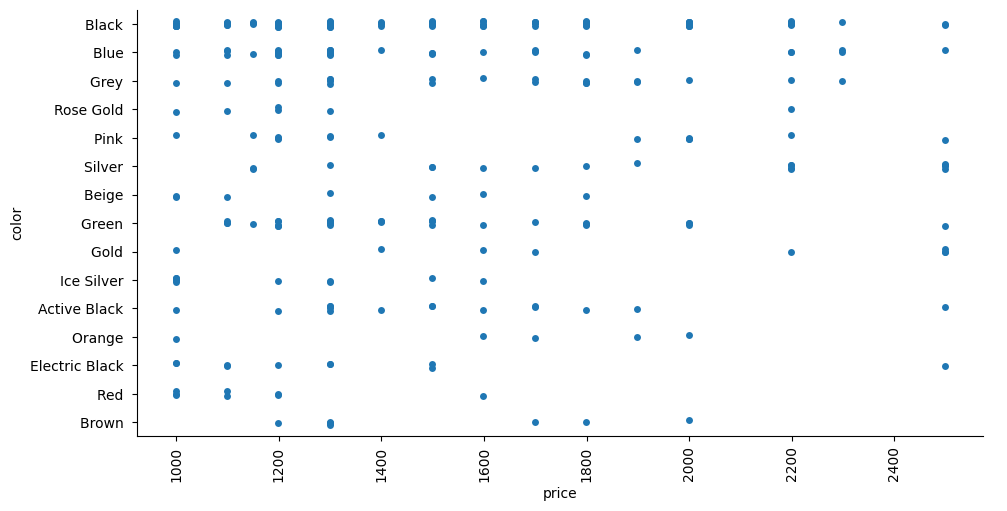

In [85]:
top_brand_name = df['color'].value_counts().head(15).index.tolist()
top_price = df['price'].value_counts().head(15).index.tolist()


filtered = df[df['color'].isin(top_brand_name) & df['price'].isin(top_price) ]

sns.catplot(data=filtered , x='price' , y='color'   , kind='strip', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

# which brand giving most of the per_of

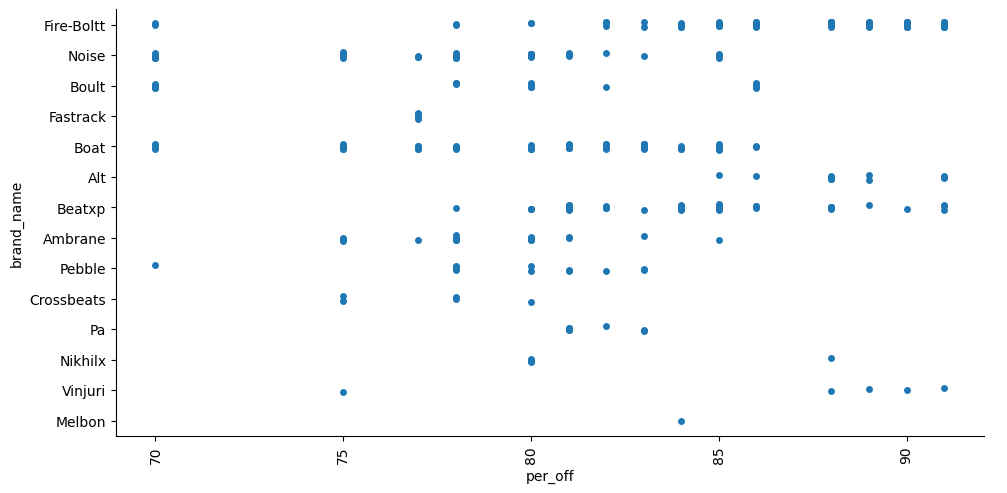

In [87]:
top_brand_name = df['brand_name'].value_counts().head(15).index.tolist()
top_per_off = df['per_off'].value_counts().head(15).index.tolist()


filtered = df[df['per_off'].isin(top_per_off) & df['brand_name'].isin(top_brand_name) ]

sns.catplot(data=filtered , x='per_off' , y='brand_name'   , kind='strip', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

,brand_name,model_name,color,price,sponcerd,rs_off,per_off,Btcalling
0,Fastrack,Revoltt,Black,999,Sponsored,3995,74,yes
1,Fire-Boltt,Hurricane,Black,1149,Sponsored,8999,87,NaN
2,Fire-Boltt,Rise,Black,1249,NaN,11999,89,yes
3,Fire-Boltt,Ninja,Pink Gold,1099,NaN,7999,86,NaN
4,Noise,Colorfit,Blue,1149,NaN,5999,80,yes
...,...,...,...,...,...,...,...,...
642,Boat,Lunar,Metal Grey,1599,NaN,8499,81,NaN
643,Shopevolves,Nextfit,Black,1789,NaN,13999,87,NaN
644,Shriraj,Dz09,Black,748,NaN,1457,48,NaN
645,Storia,Dz09,Black,999,NaN,1299,23,NaN
